In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("D:/python/project 3/Online Retail.xlsx")

In [3]:
df = data.copy()

In [4]:
df['InvoiceNo'] = df['InvoiceNo'].astype('string')
df[['StockCode', 'Description', 'Country']] = df[['StockCode', 'Description', 'Country']].astype('string')

In [5]:
na_ds = df[df['Description'].isna()]
na_ds['Quantity'].sum()

-13609

In [6]:
mostfreq = df.groupby('StockCode')['Description'].value_counts().reset_index()
mostfreq = mostfreq.sort_values(by='count', ascending=False)
mostfreq

,StockCode,Description,count
4221,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1554,22423,REGENCY CAKESTAND 3 TIER,2200
4197,85099B,JUMBO BAG RED RETROSPOT,2159
3295,47566,PARTY BUNTING,1727
210,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
3132,35954,counted,1
3131,35954,check,1
3126,35923,check,1
3117,35915C,damaged,1


In [7]:
mostfreq = mostfreq.groupby('StockCode').head(1)
mostfreq

,StockCode,Description,count
4221,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1554,22423,REGENCY CAKESTAND 3 TIER,2200
4197,85099B,JUMBO BAG RED RETROSPOT,2159
3295,47566,PARTY BUNTING,1727
210,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
3059,35600A,Found by jackie,1
3050,35597B,BLACKCHRISTMAS TREE 30CM,1
3101,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
3154,37330,BIG POLKADOT MUG,1


In [8]:
df2 = df.merge(mostfreq, on='StockCode', how='left')
df2

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [9]:
df2['Description_x'] = df2['Description_y']

In [10]:
df2.dropna(subset='Description_x', inplace=True)

In [11]:
df2.drop(columns=['Description_y', 'count'], inplace=True)

In [12]:
df2.columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

In [13]:
df3 = df2[(df2['Quantity']>0) & (df2['UnitPrice']>0)]

In [14]:
df3['Total_Sales'] = df3['Quantity'] * df3['UnitPrice']

C:\Users\gnikh\AppData\Local\Temp\ipykernel_14012\615139237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Total_Sales'] = df3['Quantity'] * df3['UnitPrice']


In [15]:
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [17]:
cureentdate = df3['InvoiceDate'].max() + pd.Timedelta(days=+1)
cureentdate

Timestamp('2011-12-10 12:50:00')

In [23]:
rfm = df3.groupby('CustomerID').agg({
    "InvoiceDate" : lambda x : (cureentdate - x.max()).days,
    "InvoiceNo" : 'count',
    "Total_Sales" : 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [26]:
rfm['r_score'] = pd.qcut(rfm['Recency'], 4, (4, 3, 2, 1))
rfm['f_score'] = pd.qcut(rfm['Frequency'], 4, (1, 2, 3, 4))
rfm['m_score'] = pd.qcut(rfm['Monetary'], 4, (1, 2, 3, 4))
rfm['Score'] = rfm[['r_score', 'f_score', 'm_score']].sum(axis=1)

ranked_customers = rfm.sort_values(by='Score', ascending=False)
ranked_customers

,Recency,Frequency,Monetary,r_score,f_score,m_score,Score
CustomerID,,,,,,,
18102.0,1,431,259657.30,4,4,4,12
14367.0,8,524,9261.52,4,4,4,12
17625.0,18,315,2047.00,4,4,4,12
15484.0,1,188,3594.31,4,4,4,12
14395.0,2,350,3507.71,4,4,4,12
...,...,...,...,...,...,...,...
13133.0,274,7,109.80,1,1,1,3
15578.0,162,13,127.10,1,1,1,3
13144.0,333,3,110.95,1,1,1,3


Text(0, 0.5, 'No. of Customers')

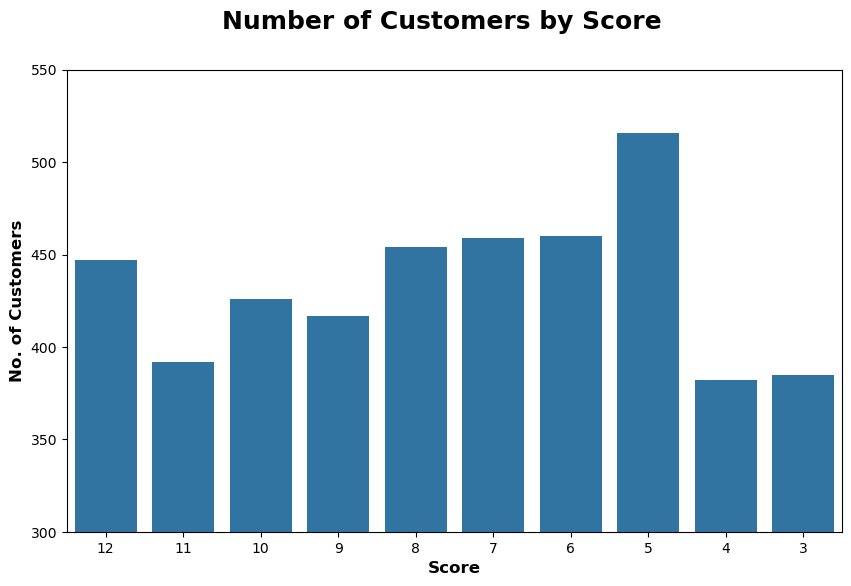

In [51]:
customersloyalty = ranked_customers.reset_index()

customersloyalty1 = customersloyalty.groupby('Score')['CustomerID'].count()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=customersloyalty1, ax=ax)
ax.invert_xaxis()
plt.ylim(300,550)
plt.suptitle('Number of Customers by Score', fontsize=18, fontweight='bold')
plt.xlabel('Score', fontsize=12,fontweight='bold')
plt.ylabel('No. of Customers', fontsize=12,fontweight='bold')

In [56]:
customers_last = df3.groupby('CustomerID')['InvoiceDate'].max()
customers_last

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
                  ...        
18280.0   2011-03-07 09:52:00
18281.0   2011-06-12 10:53:00
18282.0   2011-12-02 11:43:00
18283.0   2011-12-06 12:02:00
18287.0   2011-10-28 09:29:00
Name: InvoiceDate, Length: 4338, dtype: datetime64[ns]

In [57]:
customers_last = (cureentdate - customers_last).dt.days
customers_last

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
          ... 
18280.0    278
18281.0    181
18282.0      8
18283.0      4
18287.0     43
Name: InvoiceDate, Length: 4338, dtype: int64

In [61]:
churn_limit = 90
churned_customers = customers_last[customers_last > churn_limit]
churned_customers

CustomerID
12346.0    326
12350.0    310
12353.0    204
12354.0    232
12355.0    214
          ... 
18262.0    140
18268.0    134
18269.0    366
18280.0    278
18281.0    181
Name: InvoiceDate, Length: 1449, dtype: int64

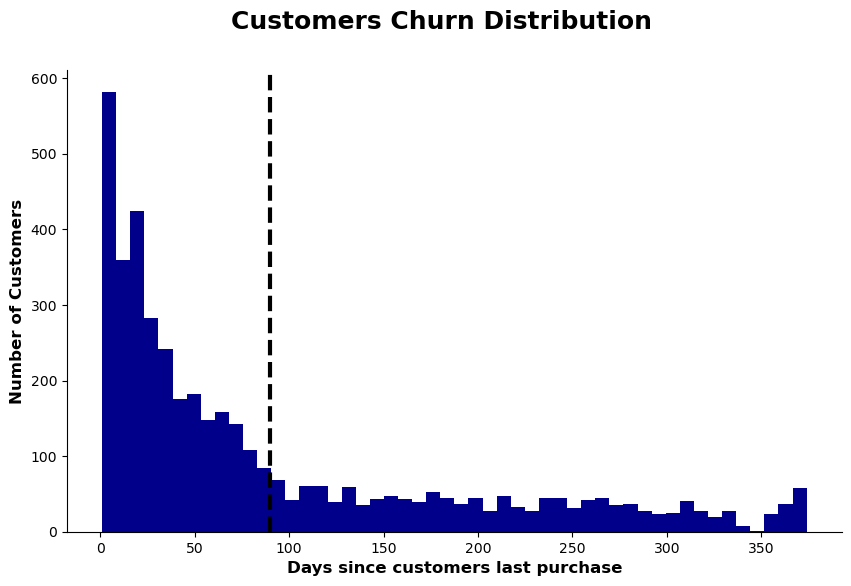

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
customers_last.plot(kind='hist', bins=50,color='darkblue', ax=ax)
plt.axvline(churn_limit, linestyle='--', linewidth=3, color='black')

plt.suptitle('Customers Churn Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Days since customers last purchase', fontsize=12,fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12,fontweight='bold')
sns.despine()
